In [2]:
import tensorflow as tf
from IPython.display import Image, display

In [3]:
sess = tf.InteractiveSession()

In [18]:
# Problem 1a
x = tf.random_uniform([])
y = tf.random_uniform([])
out = tf.cond(tf.greater(x,y), lambda: x+y, lambda: x-y)
out.eval()

0.7887831

In [25]:
# Problem 1b
x = tf.random_uniform([], minval=-1,maxval=1) # tf.random_uniform([], -1, 1) is acceptable
y = tf.random_uniform([], minval=-1,maxval=1)
f1 = lambda: x+y
f2 = lambda: x-y
out = tf.case([(tf.less(x, y), f1)], default=f2)
out.eval()

1.0962856

In [24]:
# Problem 1c
x = tf.constant([[0, -2, -1], [0, 1, 2]])
y = tf.zeros_like(x)
answer = tf.equal(x,y)
answer.eval()

array([[ True, False, False],
       [ True, False, False]])

In [38]:
# Problem 1d
x = tf.constant([29.05088806,  27.61298943,  31.19073486,  29.35532951, 30.97266006,  26.67541885,  38.08450317,  20.74983215,
                 34.94445419,  34.45999146,  29.06485367,  36.01657104, 27.88236427,  20.56035233,  30.20379066,  29.51215172,
                 33.71149445,  28.59134293,  36.05556488,  28.66994858])
answer1 = tf.where(x>30)
print(answer1.eval())
answer2 = x[tf.greater(x,30)]
print(answer2.eval())


[[ 2]
 [ 4]
 [ 6]
 [ 8]
 [ 9]
 [11]
 [14]
 [16]
 [18]]
[31.190735 30.97266  38.084503 34.944454 34.45999  36.01657  30.20379
 33.711494 36.055565]


In [51]:
# Problem 1e
diagonal = tf.range(1,7)
print('matrix:',diagonal.eval())
x = tf.diag(diagonal)
print('diagonal: \n',x.eval())

matrix: [1 2 3 4 5 6]
diagonal: 
 [[1 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


In [55]:
# Problem 1f
x = tf.random_normal([10,10])
d = tf.matrix_determinant(x)
d.eval()

295.74088

In [58]:
# Problem 1g
x = tf.constant([5, 2, 3, 5, 10, 6, 2, 3, 4, 2, 1, 1, 0, 9])
y, idx = tf.unique(x)  # tf.unique returns a tuple with unique values and indexies of unique elements
y.eval()

array([ 5,  2,  3, 10,  6,  4,  1,  0,  9])

In [63]:
# Problem 1h
x = tf.random_normal([300])
y = tf.random_normal([300])
f1 = lambda: tf.losses.mean_squared_error(x,y)
f2 = lambda: tf.reduce_sum(tf.abs(x-y))
answer = tf.cond(tf.reduce_mean(x-y)<0,f1,f2)
answer.eval()

320.98697

In [55]:
# Simple Linear Regression Example
import xlrd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [56]:
file = 'fire_theft.xls'
book1 = xlrd.open_workbook(file, encoding_override = 'utf-8')

In [57]:
sheet = book1.sheet_by_index(0)

In [58]:
sheet.nrows

43

In [59]:
sheet.row_values(0)

['X', 'Y']

In [60]:
data = [sheet.row_values(i) for i in range(1,sheet.nrows)]

In [61]:
data[:5] # [ [x1,y1], [x2,y2],..]

[[6.2, 29.0], [9.5, 44.0], [10.5, 36.0], [7.7, 37.0], [8.6, 53.0]]

In [62]:
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]
x = tf.placeholder(tf.float32, shape=())
y = tf.placeholder(tf.float32,shape=())
w = tf.Variable(tf.truncated_normal(shape=()))
b = tf.Variable(tf.zeros(shape=()))
y_pred = tf.reduce_sum(tf.multiply(x,w)+b)
loss = tf.square(y-y_pred)
# loss = tf.sqrt(tf.square(y), tf.square(y_pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(1000):
        epoch_loss = 0
        for X, Y in data:
            _, step_loss = sess.run([optimizer,loss], feed_dict={x: X, y: Y})
            epoch_loss = epoch_loss + step_loss/len(x_data)
        if epoch%10==0:
            y_pred1 = sess.run(tf.multiply(x_data,w)+b)
            sqr_err = sess.run(tf.losses.mean_squared_error(y_data, y_pred1))
            print('epoch %s: sqr error: %s   total epoch loss: %s'%(epoch, sqr_err, epoch_loss))
    # return w and b
    w_value, b_value = sess.run([w, b])
    print('w = %s, b = %s'%(w_value, b_value))

epoch 0: sqr error: 661.52783   total epoch loss: 2067.751861183416
epoch 10: sqr error: 562.5062   total epoch loss: 1926.9207770129042
epoch 20: sqr error: 500.81412   total epoch loss: 1774.7336177103934
epoch 30: sqr error: 461.8284   total epoch loss: 1667.3532922121117
epoch 40: sqr error: 436.79752   total epoch loss: 1590.5041912804757
epoch 50: sqr error: 420.4487   total epoch loss: 1534.8215875991043
epoch 60: sqr error: 409.57748   total epoch loss: 1494.0490360381527
epoch 70: sqr error: 402.21686   total epoch loss: 1463.9320243004531
epoch 80: sqr error: 397.14505   total epoch loss: 1441.5265057173203
epoch 90: sqr error: 393.59213   total epoch loss: 1424.7614781608186
epoch 100: sqr error: 391.06558   total epoch loss: 1412.1589844631299
epoch 110: sqr error: 389.2451   total epoch loss: 1402.651461008049
epoch 120: sqr error: 387.9182   total epoch loss: 1395.4582085197883
epoch 130: sqr error: 386.94196   total epoch loss: 1390.003907249797
epoch 140: sqr error: 386

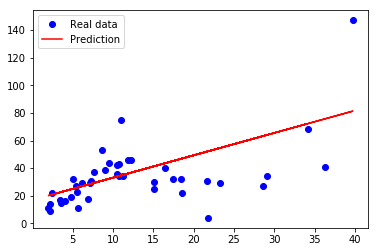

In [14]:
plt.plot(x_data, y_data,'bo', label='Real data')
plt.plot(x_data, np.array(x_data)*w_value+b_value, 'r', label = 'Prediction')
plt.legend()
plt.show()

## MNIST simple Fully Connected NN

### Load the data

In [1]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
# Use the python MNIST library to get the data
from mnist import MNIST
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score
import tflearn

C:\Users\gj310e\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gj310e\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gj310e\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gj310e\AppData\Local\C

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
# But we will get MNIST data from python library
mndata = MNIST('./mnist')
images, labels = mndata.load_training()

In [3]:
# convers to numpy
images = np.array(images)
labels = np.array(labels)
print('images: %s, labels: %s'%(images.shape, labels.shape))

images: (60000, 784), labels: (60000,)


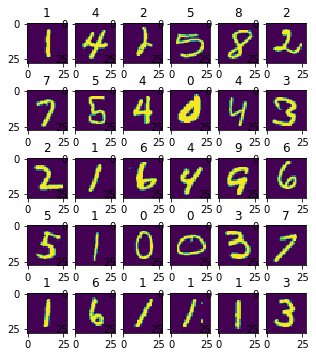

In [4]:
# plot the random images
def plot_img(size, images, labels):  # size = (x, y)
    num_img = size #rows,columns
    rand_img = np.random.randint(labels.size, size=num_img[0]*num_img[1])
    fig=plt.figure(figsize=(num_img[0], num_img[1]))
    for i in range(1, num_img[0]*num_img[1]+1):
        img = images[rand_img[i-1],:].reshape(28,28)
        fig.add_subplot(num_img[0],num_img[1],i)
        plt.imshow(img)
        plt.title(labels[rand_img[i-1]])
    plt.show()
plot_img((5,6), images, labels)

In [5]:
# create randomized data set
def randomize(data_set,labels_set):
    permutation = np.random.permutation(labels_set.size)
    shuffled_data = data_set[permutation,:]
    shuffled_labels = labels_set[permutation]
    return shuffled_data, shuffled_labels
shuffled_data, shuffled_labels = randomize(images,labels)

In [6]:
# one hot endode labels
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(shuffled_labels.reshape(-1,1))
shuffled_labels = enc.transform(shuffled_labels.reshape(-1,1)).toarray()

In [7]:
shuffled_labels.shape

(60000, 10)

In [8]:
# Split the data on train and test
X_train, X_test, y_train, y_test = train_test_split(shuffled_data, shuffled_labels, test_size = 0.1, random_state = 30)

In [9]:
X_test.shape

(6000, 784)

In [10]:
# As a Note to below plotting (y_train is hot encoded, but for plotting we need to get back normal labels)
np.argmax(y_train, 1)

array([7, 7, 3, ..., 8, 4, 6], dtype=int64)

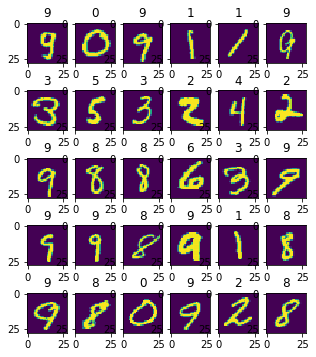

In [11]:
# plot the random images from Train set
plot_img((5,6), X_train, np.argmax(y_train, 1))

## TFLearn approach, fully connected with 2 hidden layers

In [133]:
# Define the neural network
def build_model():
    # This resets all parameters and variables, leave this here
    tf.reset_default_graph()
    # input layer
    net = tflearn.input_data([None, 784]) 
    
    # hidden layers
    net = tflearn.fully_connected(net, 128, activation='ReLU')    
    net = tflearn.fully_connected(net, 32, activation='ReLU')
    # Output 
    net = tflearn.fully_connected(net, 10, activation='softmax') 
    
    #net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
    # or use below for decayed_learning_rate = learning_rate *  decay_rate ^ (global_step / decay_steps)
    sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=100)
    net = tflearn.regression(net, optimizer=sgd, loss='categorical_crossentropy') 
    # This model assumes that your network is named "net"    
    model = tflearn.DNN(net)
    return model

In [134]:
# Build the model
model = build_model()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [135]:
# Training
model.fit(X_train, y_train, validation_set=0.1, show_metric=True, batch_size=126, n_epoch=30)

Training Step: 11579  | total loss: 0.23789 | time: 1.130s
| SGD | epoch: 030 | loss: 0.23789 - acc: 0.9398 -- iter: 48510/48600
Training Step: 11580  | total loss: 0.24572 | time: 2.140s
| SGD | epoch: 030 | loss: 0.24572 - acc: 0.9387 | val_loss: 0.25435 - val_acc: 0.9363 -- iter: 48600/48600
--


In [136]:
predictions = np.array(model.predict(X_test))
predictions.shape

(6000, 10)

In [137]:
# function ot check the accuracy in OneHot Encoded sets
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [138]:
# almost same with validation score
accuracy(predictions, y_test)

92.85

## Tensorflow fully connected with 2 hidden layers

In [23]:
n_inputs = 28*28 # MNIST
n_hidden1 = 128
n_hidden2 = 32
n_outputs = 10
learning_rate = 0.1
n_epochs = 30
batch_size = 126

graph = tf.Graph()

with graph.as_default() as graph:
    
    # Placeholders for batch data 
    X = tf.placeholder(tf.float32, [None,n_inputs])
    Y = tf.placeholder(tf.float32, [None,n_outputs])
    
    # Variables for learning
    w1 = tf.Variable(tf.truncated_normal((n_inputs, n_hidden1), stddev=0.1))
    b1 = tf.Variable(tf.zeros([n_hidden1]))

    w2 = tf.Variable(tf.truncated_normal((n_hidden1, n_hidden2), stddev=0.1))
    b2 = tf.Variable(tf.zeros([n_hidden2]))
    
    w3 = tf.Variable(tf.truncated_normal((n_hidden2, n_outputs), stddev=0.1))
    b3 = tf.Variable(tf.zeros([n_outputs]))

    # Logits
    out = tf.nn.relu(tf.matmul(X,w1)+b1)
    out1 = tf.nn.relu(tf.matmul(out,w2)+b2)
    logits = tf.matmul(out1, w3)+b3
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits))
    
    #GD Optimizer
    #optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
    
    #AdamOptimizer
    optimizer = tf.train.AdamOptimizer().minimize(loss)
    
    
    # Optimizer - gradient descent with learning rate decay
    #global_step = tf.Variable(0)
    #start_learning_rate = 0.01
    #learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.96, staircase=True)
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    
    Y_pred = tf.nn.softmax(logits)
    is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_pred,1))
    accur = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [14]:
batch_size = 126
with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    print('Initialized')
    num_steps = y_train.shape[0]//batch_size
    for epoch in range(50+1):
        for step in range(num_steps+1):
            offset = (step*batch_size)
            batch_x = X_train[offset:(offset+batch_size),:]
            batch_y = y_train[offset:(offset+batch_size),:]
            feed_dict = {X: batch_x, Y: batch_y}

            _,l,a = sess.run([optimizer, loss, accur], feed_dict=feed_dict)
        if epoch%5==0:
            #l, a = sess.run([loss, accur], feed_dict=feed_dict)
            print('Train    step %d   loss %f   accuracy %f'%(epoch, l, a))
            feed_dict = {X: X_test, Y: y_test}
            l1, a1 = sess.run([loss, accur], feed_dict={X: X_test, Y: y_test})
            print('Test    **********  loss %f  accuracy %f'%(l1, a1))

Initialized
Train    step 0   loss 0.831333   accuracy 0.722222
Test    **********  loss 0.679523  accuracy 0.796333
Train    step 5   loss 0.149169   accuracy 0.972222
Test    **********  loss 0.194327  accuracy 0.948833
Train    step 10   loss 0.013203   accuracy 1.000000
Test    **********  loss 0.197642  accuracy 0.959000
Train    step 15   loss 0.028636   accuracy 0.986111
Test    **********  loss 0.206272  accuracy 0.960000
Train    step 20   loss 0.002612   accuracy 1.000000
Test    **********  loss 0.204676  accuracy 0.966000
Train    step 25   loss 0.000328   accuracy 1.000000
Test    **********  loss 0.190949  accuracy 0.969833
Train    step 30   loss 0.058559   accuracy 0.986111
Test    **********  loss 0.255600  accuracy 0.964000
Train    step 35   loss 0.002444   accuracy 1.000000
Test    **********  loss 0.211761  accuracy 0.969667
Train    step 40   loss 0.002516   accuracy 1.000000
Test    **********  loss 0.260678  accuracy 0.967000
Train    step 45   loss 0.001670   a

## LSTM approach
### Load the data from previous section (fully connected NN), 5 epochs test_accuracy = 0.855

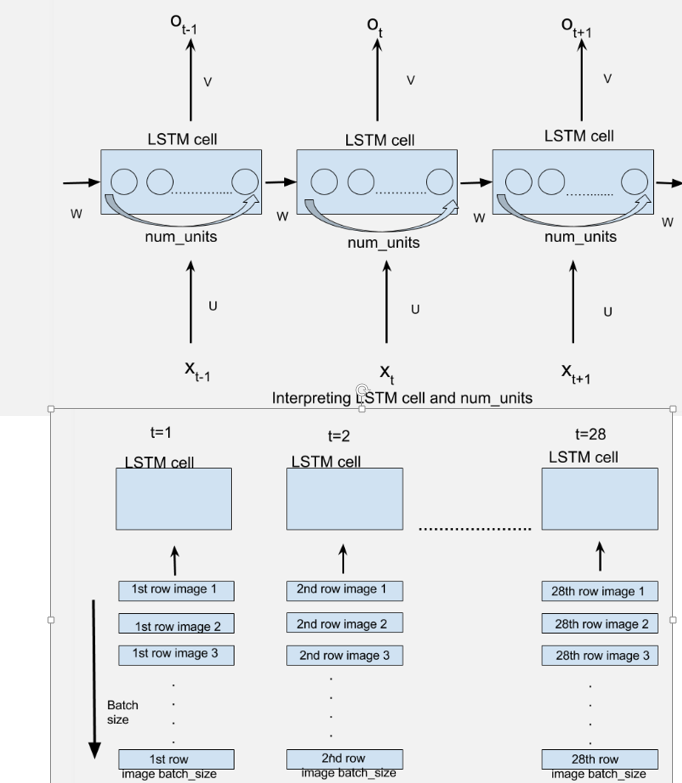

In [19]:
display(Image(filename='lstm_0.PNG', embed=True, width=700))

In [ ]:
from tensorflow.contrib import layers   # fully connected without activation, same as tf.contrib.layers.fully_connected(…, activation_fn=None)

In [20]:
print('Train set', X_train.shape, y_train.shape)
print('Test set ', X_test.shape, y_test.shape)

Train set (54000, 784) (54000, 10)
Test set  (6000, 784) (6000, 10)


In [15]:
batch_size = 128
n_steps = 28
cellsize = 28
num_classes = 10
#n_layers = 3
dimhidden = 128 #hidden layer after input before LSTM
learning_rate = 0.001


def _RNN(_X, _istate, _W, _b, _nsteps, _name):
    # 1. Permute input from [batchsize, nsteps, diminput] 
    #   => [nsteps, batchsize, diminput]
    _X = tf.transpose(_X, [1, 0, 2])
    # 2. Reshape input to [nsteps*batchsize, diminput] 
    _X = tf.reshape(_X, [-1, cellsize])
    # 3. Input layer => Hidden layer
    _H = tf.matmul(_X, _W['hidden']) + _b['hidden']
    # 4. Splite data to 'nsteps' chunks. An i-th chunck indicates i-th batch data 
    _Hsplit = tf.split(_H, n_steps,0)
    # 5. Get LSTM's final output (_LSTM_O) and state (_LSTM_S)
    #    Both _LSTM_O and _LSTM_S consist of 'batchsize' elements
    #    Only _LSTM_O will be used to predict the output. 
    with tf.variable_scope(_name):
        lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(dimhidden, forget_bias=1.0)
        _LSTM_O, _LSTM_S = tf.nn.static_rnn(lstm_cell, _Hsplit, dtype="float32")
    # 6. Output
    _O = tf.matmul(_LSTM_O[-1], _W['out']) + _b['out']    
    # Return! 
    return {
        'X': _X, 'H': _H, 'Hsplit': _Hsplit,
        'LSTM_O': _LSTM_O, 'LSTM_S': _LSTM_S, 'O': _O 
    }
print ("Network ready")

graph = tf.Graph()

with graph.as_default() as graph:
    
    weights = {
        'hidden': tf.Variable(tf.random_normal([cellsize, dimhidden])), 
        'out': tf.Variable(tf.random_normal([dimhidden, num_classes]))}
    biases = {
        'hidden': tf.Variable(tf.random_normal([dimhidden])),
        'out': tf.Variable(tf.random_normal([num_classes]))}
    
    x = tf.placeholder(tf.float32, shape=[None, n_steps, cellsize])
    y = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    #here I do not use Hin , so it may be removed (in feed_dict also)
    Hin = tf.placeholder(tf.float32, shape=[None, 2*dimhidden])
    
    myrnn  = _RNN(x, Hin, weights, biases, n_steps, 'basic')
    
    # unroll mcell with dynamic RNN
    
    pred = myrnn['O']
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
    optm = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    accr = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred,1), tf.argmax(y,1)), tf.float32))

Network ready


In [13]:
training_epochs = 5
batch_size      = 128
display_step    = 1

with tf.Session(graph = graph) as sess:
    tf.global_variables_initializer().run()
    print('Initialized')
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(y_train)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            offset = (i*batch_size)
            batch_xs = X_train[offset:(offset+batch_size),:]
            batch_ys = y_train[offset:(offset+batch_size),:]
            batch_xs = batch_xs.reshape((batch_size, 28, 28))
            # Fit training using batch data
            feeds = {x: batch_xs, y: batch_ys, Hin: np.zeros((batch_size, 2*dimhidden))}
            sess.run(optm, feed_dict=feeds)
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict=feeds)/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0: 
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            feeds = {x: batch_xs, y: batch_ys, Hin: np.zeros((batch_size, 2*dimhidden))}
            train_acc = sess.run(accr, feed_dict=feeds)
            print (" Training accuracy: %.3f" % (train_acc))
            testimgs = X_test.reshape((-1, 28, 28))
            feeds = {x: testimgs, y: y_test, Hin: np.zeros((testimgs.shape[0], 2*dimhidden))}
            test_acc = sess.run(accr, feed_dict=feeds)
            print (" Test accuracy: %.3f" % (test_acc))
    print ("Optimization Finished.")

Initialized
Epoch: 000/005 cost: 0.902592523
 Training accuracy: 0.805
 Test accuracy: 0.771
Epoch: 001/005 cost: 0.547439596
 Training accuracy: 0.789
 Test accuracy: 0.828
Epoch: 002/005 cost: 0.478229885
 Training accuracy: 0.812
 Test accuracy: 0.838
Epoch: 003/005 cost: 0.458109486
 Training accuracy: 0.844
 Test accuracy: 0.854
Epoch: 004/005 cost: 0.429052008
 Training accuracy: 0.852
 Test accuracy: 0.855
Optimization Finished.


## without a hidden layer before LSTM, result is better, 5 epochs test_accuracy = 0.912

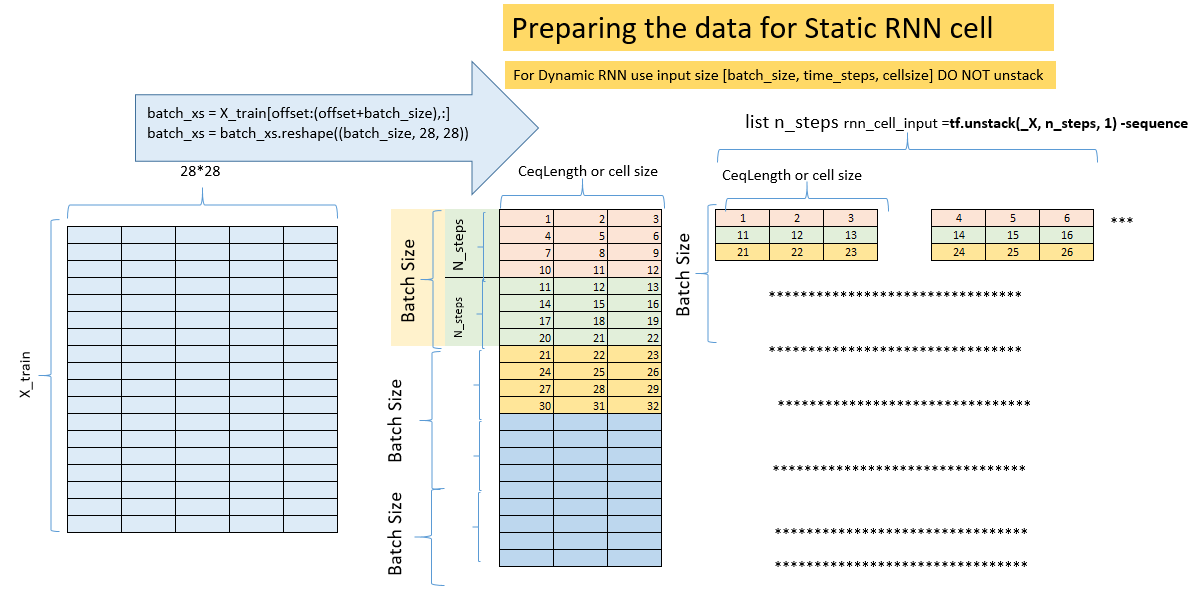

In [4]:
display(Image(filename='lstm_1.PNG', embed=True, width=1000))

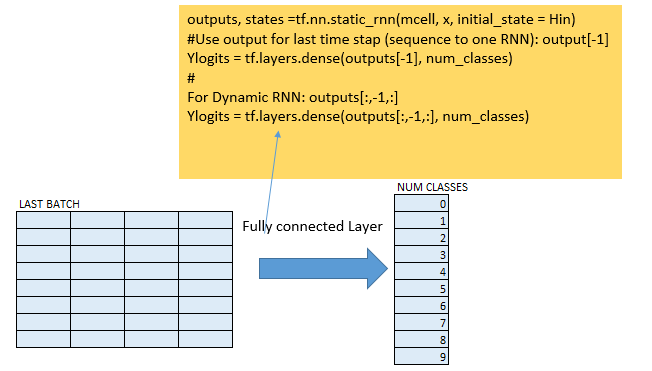

In [8]:
display(Image(filename='lstm_2.PNG', embed=True, width=700))

In [22]:
batch_size = 128
n_steps = 28
cellsize = 28
num_classes = 10
#n_layers = 3
dimhidden = 128 #hidden layer after input before LSTM
learning_rate = 0.001


def _RNN(_X, _istate, _W, _b, _nsteps, _name):
    # 1. Permute input from [batchsize, nsteps, diminput] 
    #   => [nsteps, batchsize, diminput]
    #_X = tf.transpose(_X, [1, 0, 2])
    # 2. Reshape input to [nsteps*batchsize, diminput] 
   # _X = tf.reshape(_X, [-1, cellsize])
    # 4. Splite data to 'nsteps' chunks. An i-th chunck indicates i-th batch data 
    #_Hsplit = tf.unstack(_X, n_steps, 1)
    _Hsplit = tf.unstack(_X, n_steps, 1)
    # 5. Get LSTM's final output (_LSTM_O) and state (_LSTM_S)
    #    Both _LSTM_O and _LSTM_S consist of 'batchsize' elements
    #    Only _LSTM_O will be used to predict the output. 
    with tf.variable_scope(_name):
        lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(dimhidden, forget_bias=1.0)
        _LSTM_O, _LSTM_S = tf.nn.static_rnn(lstm_cell, _Hsplit, dtype="float32")
    # 6. Output
    _O = tf.matmul(_LSTM_O[-1], _W['out']) + _b['out']    
    # Return! 
    return {
        'X': _X, 'Hsplit': _Hsplit,
        'LSTM_O': _LSTM_O, 'LSTM_S': _LSTM_S, 'O': _O 
    }
print ("Network ready")

graph = tf.Graph()

with graph.as_default() as graph:
    
    weights = {
        'out': tf.Variable(tf.random_normal([dimhidden, num_classes]))}
    biases = {
        'out': tf.Variable(tf.random_normal([num_classes]))}
    
    x = tf.placeholder(tf.float32, shape=[None, n_steps, cellsize])
    y = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    #here I do not use Hin , so it may be removed (in feed_dict also)
    Hin = tf.placeholder(tf.float32, shape=[None, 2*dimhidden])
    
    myrnn  = _RNN(x, Hin, weights, biases, n_steps, 'basic')
    
    # unroll mcell with dynamic RNN
    
    pred = myrnn['O']
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
    optm = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    accr = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred,1), tf.argmax(y,1)), tf.float32))

Network ready


In [20]:
with tf.Session(graph = graph) as sess:
    tf.global_variables_initializer().run()
    print('Initialized')
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(y_train)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            offset = (i*batch_size)
            batch_xs = X_train[offset:(offset+batch_size),:]
            batch_ys = y_train[offset:(offset+batch_size),:]
            batch_xs = batch_xs.reshape((batch_size, 28, 28))
            # Fit training using batch data
            feeds = {x: batch_xs, y: batch_ys, Hin: np.zeros((batch_size, 2*dimhidden))}
            sess.run(optm, feed_dict=feeds)
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict=feeds)/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0: 
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            feeds = {x: batch_xs, y: batch_ys, Hin: np.zeros((batch_size, 2*dimhidden))}
            train_acc = sess.run(accr, feed_dict=feeds)
            print (" Training accuracy: %.3f" % (train_acc))
            testimgs = X_test.reshape((-1, 28, 28))
            feeds = {x: testimgs, y: y_test, Hin: np.zeros((testimgs.shape[0], 2*dimhidden))}
            test_acc = sess.run(accr, feed_dict=feeds)
            print (" Test accuracy: %.3f" % (test_acc))
    print ("Optimization Finished.")

Initialized
Epoch: 000/005 cost: 0.691995152
 Training accuracy: 0.859
 Test accuracy: 0.860
Epoch: 001/005 cost: 0.347753912
 Training accuracy: 0.914
 Test accuracy: 0.882
Epoch: 002/005 cost: 0.287590667
 Training accuracy: 0.922
 Test accuracy: 0.895
Epoch: 003/005 cost: 0.244730018
 Training accuracy: 0.961
 Test accuracy: 0.900
Epoch: 004/005 cost: 0.220489152
 Training accuracy: 0.953
 Test accuracy: 0.912
Optimization Finished.


## GRU NN, better result, 5 epochs, test_accuracy = 0.942

In [23]:
print('Train set', X_train.shape, y_train.shape)
print('Test set ', X_test.shape, y_test.shape)

Train set (54000, 784) (54000, 10)
Test set  (6000, 784) (6000, 10)


### Dynamic RNN is used (do not need to unstack inputs)

In [18]:
# clear graph
tf.reset_default_graph()

batch_size = 128
n_steps = 28
cellsize = 28
num_classes = 10
n_layers = 3
dimhidden = 128 #hidden layer after input before LSTM
learning_rate = 0.001

graph = tf.Graph()

with graph.as_default() as graph:
    x = tf.placeholder(tf.float32, [None, n_steps, cellsize])
    y = tf.placeholder(tf.float32, [None, num_classes])
    
    Hin = tf.placeholder(tf.float32, [None, cellsize*n_layers])
    #x_in = tf.unstack(x, n_steps, 1)
    # the model
    cell = tf.nn.rnn_cell.GRUCell(cellsize)  # define weights and biases internally
    mcell = tf.nn.rnn_cell.MultiRNNCell([cell]*n_layers, state_is_tuple=False)
    Hr, H =tf.nn.dynamic_rnn(mcell, x, initial_state = Hin)
    
    # softmax output layer
    #Hf = tf.reshape(Hr, [-1,cellsize])
    Ylogits = tf.layers.dense(Hr[:,-1,:], num_classes) #activation=None by default
    Y = tf.nn.softmax(Ylogits)
    loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=y))
    train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)
    accr = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(Y,1)),tf.float32))

In [19]:
training_epochs = 5
batch_size      = 128
display_step    = 1

with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    avg_cost = 0.
    steps = len(y_train)//batch_size
    for epoch in range(training_epochs):
        for step in range(steps):
            batch_xs = X_train[step*batch_size:step*batch_size+batch_size, :]
            batch_xs = batch_xs.reshape([batch_size, n_steps, cellsize])
            batch_ys = y_train[step*batch_size:step*batch_size+batch_size, :]
            
            # Fit training using batch data
            inH = np.zeros((batch_size, cellsize*n_layers))
            feeds = {x: batch_xs, y: batch_ys, Hin: inH}
            sess.run(train_step, feed_dict=feeds)
            # Compute average loss
            avg_cost += sess.run(loss, feed_dict=feeds)/steps
        # Display logs per epoch step
        if epoch % display_step == 0: 
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            feeds = {x: batch_xs, y: batch_ys, Hin: np.zeros((batch_size, cellsize*n_layers))}
            train_acc = sess.run(accr, feed_dict=feeds)
            print (" Training accuracy: %.3f" % (train_acc))
            testimgs = X_test.reshape((-1, 28, 28))
            feeds = {x: testimgs, y: y_test, Hin: np.zeros((testimgs.shape[0], cellsize*n_layers))}
            test_acc = sess.run(accr, feed_dict=feeds)
            print (" Test accuracy: %.3f" % (test_acc))
    print ("Optimization Finished.")            

Epoch: 000/005 cost: 1.157223884
 Training accuracy: 0.766
 Test accuracy: 0.799
Epoch: 001/005 cost: 1.607040314
 Training accuracy: 0.859
 Test accuracy: 0.889
Epoch: 002/005 cost: 1.901086790
 Training accuracy: 0.914
 Test accuracy: 0.918
Epoch: 003/005 cost: 2.130367634
 Training accuracy: 0.906
 Test accuracy: 0.930
Epoch: 004/005 cost: 2.322549361
 Training accuracy: 0.906
 Test accuracy: 0.940
Optimization Finished.


### Static RNN is used. Need to unstack input X values. 

### Outputs from LSTM  is for last batch. Hr(outputs) - list of elements [batch_size, num_units] with length=time_steps 

In [25]:
# clear graph
tf.reset_default_graph()

batch_size = 128
n_steps = 28
cellsize = 28
num_classes = 10
n_layers = 3
dimhidden = 128 #hidden layer after input before LSTM
learning_rate = 0.001

graph = tf.Graph()

with graph.as_default() as graph:
    x = tf.placeholder(tf.float32, [None, n_steps, cellsize])
    y = tf.placeholder(tf.float32, [None, num_classes])
    
    Hin = tf.placeholder(tf.float32, [None, cellsize*n_layers])
    x_in = tf.unstack(x, n_steps, 1)
    # the model
    cell = tf.nn.rnn_cell.GRUCell(cellsize)  # define weights and biases internally
    mcell = tf.nn.rnn_cell.MultiRNNCell([cell]*n_layers, state_is_tuple=False)
    Hr, H =tf.nn.static_rnn(mcell, x_in, initial_state = Hin)
    
    # softmax output layer
    #Hf = tf.reshape(Hr, [-1,cellsize])
    Ylogits = tf.layers.dense(Hr[-1], num_classes) #activation=None by default; weights and biases internally
    Y = tf.nn.softmax(Ylogits)
    loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=y))
    train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)
    accr = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(Y,1)),tf.float32))

In [26]:
training_epochs = 5
batch_size      = 128
display_step    = 1

with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    avg_cost = 0.
    steps = len(y_train)//batch_size
    for epoch in range(training_epochs):
        for step in range(steps):
            batch_xs = X_train[step*batch_size:step*batch_size+batch_size, :]
            batch_xs = batch_xs.reshape([batch_size, n_steps, cellsize])
            batch_ys = y_train[step*batch_size:step*batch_size+batch_size, :]
            
            # Fit training using batch data
            inH = np.zeros((batch_size, cellsize*n_layers))
            feeds = {x: batch_xs, y: batch_ys, Hin: inH}
            sess.run(train_step, feed_dict=feeds)
            # Compute average loss
            avg_cost += sess.run(loss, feed_dict=feeds)/steps
        # Display logs per epoch step
        if epoch % display_step == 0: 
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            feeds = {x: batch_xs, y: batch_ys, Hin: np.zeros((batch_size, cellsize*n_layers))}
            train_acc = sess.run(accr, feed_dict=feeds)
            print (" Training accuracy: %.3f" % (train_acc))
            testimgs = X_test.reshape((-1, 28, 28))
            feeds = {x: testimgs, y: y_test, Hin: np.zeros((testimgs.shape[0], cellsize*n_layers))}
            test_acc = sess.run(accr, feed_dict=feeds)
            print (" Test accuracy: %.3f" % (test_acc))
    print ("Optimization Finished.")  

Epoch: 000/005 cost: 1.181489842
 Training accuracy: 0.773
 Test accuracy: 0.811
Epoch: 001/005 cost: 1.643270113
 Training accuracy: 0.859
 Test accuracy: 0.879
Epoch: 002/005 cost: 1.968430992
 Training accuracy: 0.891
 Test accuracy: 0.906
Epoch: 003/005 cost: 2.229536588
 Training accuracy: 0.922
 Test accuracy: 0.920
Epoch: 004/005 cost: 2.448168962
 Training accuracy: 0.945
 Test accuracy: 0.932
Optimization Finished.
